# EDA Notebook

The purpose of this notebook is to perform EDA on the cleaned data before modeling.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [18]:
# loading in clean_df
clean_df = pd.read_pickle('../pickle/clean_df.pkl')

In [19]:
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,round_1_tweet
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...
3,3,0,3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or...


We already know that the vocabulary for this dataset is **22021 unique words.**

## Most Frequent Words for Each Classification

In [20]:
# creating new dfs for each classification
df_freq_hate = clean_df[clean_df['label']==1]
df_freq_not_hate = clean_df[clean_df['label']==0]

In [21]:
# pulling out the text data for cleaned tweets
data_hate = df_freq_hate['round_1_tweet']
data_not_hate = df_freq_not_hate['round_1_tweet']

In [22]:
# function to tokenize tweets and remove stop words with NLTK built-in library
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [23]:
# creating lists for processed hate & not hate data
process_hate = list(map(process_tweet, data_hate))
process_not_hate = list(map(process_tweet, data_not_hate))

In [24]:
# exact amount of hate speech
total_vocab_hate = set()
for comment in process_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

3522

In [25]:
# exact amount of not hate speech
total_vocab_NOT_hate = set()
for comment in process_not_hate:
    total_vocab_NOT_hate.update(comment)
len(total_vocab_NOT_hate)

21219

## Most Common Words in Each Category

In [26]:
flat_hate = [item for sublist in process_hate for item in sublist]
flat_not_hate = [item for sublist in process_not_hate for item in sublist]

In [27]:
hate_freq = FreqDist(flat_hate)
not_hate_freq = FreqDist(flat_not_hate)

In [28]:
# Top 20 Hate Speech words:
hate_freq.most_common(20)

[('bitch', 209),
 ('faggot', 189),
 ('like', 167),
 ('nigga', 139),
 ('ass', 137),
 ('white', 126),
 ('fuck', 121),
 ('trash', 113),
 ('nigger', 111),
 ('u', 106),
 ('dont', 96),
 ('fucking', 95),
 ('im', 93),
 ('niggas', 76),
 ('fag', 74),
 ('get', 69),
 ('youre', 64),
 ('shit', 60),
 ('people', 58),
 ('faggots', 58)]

In [29]:
not_hate_freq.most_common(20)

[('bitch', 8025),
 ('bitches', 3028),
 ('like', 2600),
 ('hoes', 2315),
 ('pussy', 2059),
 ('im', 1995),
 ('hoe', 1863),
 ('dont', 1685),
 ('got', 1540),
 ('ass', 1433),
 ('get', 1359),
 ('fuck', 1293),
 ('shit', 1201),
 ('u', 1177),
 ('aint', 1139),
 ('nigga', 1059),
 ('trash', 1031),
 ('lol', 1020),
 ('know', 769),
 ('niggas', 716)]

## Normalizing Word Frequencies

In [36]:
hate_total_word_count = sum(hate_freq.values())
hate_top_25 = hate_freq.most_common(25)
print("Hate Word \t Normalized Frequency")
print()
for word in hate_top_25:
    normalized_frequency = word[1]/hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Hate Word 	 Normalized Frequency

bitch 		 0.01884
faggot 		 0.01704
like 		 0.01505
nigga 		 0.01253
ass 		 0.01235
white 		 0.01136
fuck 		 0.01091
trash 		 0.01019
nigger 		 0.01001
u 		 0.009555
dont 		 0.008653
fucking 		 0.008563
im 		 0.008383
niggas 		 0.006851
fag 		 0.00667
get 		 0.00622
youre 		 0.005769
shit 		 0.005408
people 		 0.005228
faggots 		 0.005228
hate 		 0.005138
bitches 		 0.005138
got 		 0.005138
niggers 		 0.004958
hoes 		 0.004867


In [35]:
not_hate_total_word_count = sum(not_hate_freq.values())
not_hate_top_25 = not_hate_freq.most_common(25)
print("Not Hate Word \t Normalized Frequency")
print()
for word in not_hate_top_25:
    normalized_frequency = word[1]/not_hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Not Hate Word 	 Normalized Frequency

bitch 		 0.04488
bitches 		 0.01693
like 		 0.01454
hoes 		 0.01295
pussy 		 0.01151
im 		 0.01116
hoe 		 0.01042
dont 		 0.009423
got 		 0.008612
ass 		 0.008014
get 		 0.0076
fuck 		 0.007231
shit 		 0.006716
u 		 0.006582
aint 		 0.006369
nigga 		 0.005922
trash 		 0.005766
lol 		 0.005704
know 		 0.0043
niggas 		 0.004004
love 		 0.003741
one 		 0.003708
cant 		 0.003562
yall 		 0.003478
na 		 0.003478


### Visualizing these percentages

In [37]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_freq.most_common(25)]
hate_bar_words = [x[0] for x in hate_freq.most_common(25)]

not_hate_bar_counts = [x[1] for x in not_hate_freq.most_common(25)]
not_hate_bar_words = [x[0] for x in not_hate_freq.most_common(25)]

In [40]:
# set the color of the bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

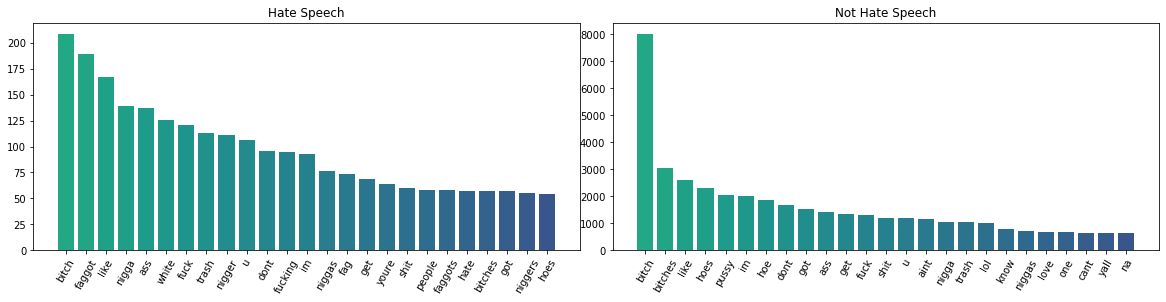

In [45]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
# generating a bar chart on each axes
ax.bar(hate_bar_words, hate_bar_counts, color=color)
ax2.bar(not_hate_bar_words, not_hate_bar_counts, color=color )

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')
plt.show()

## Word Clouds

In [46]:
from wordcloud import WordCloud
hate_dict = dict(zip(hate_bar_words, hate_bar_counts))
not_hate_dict = dict(zip(not_hate_bar_words, not_hate_bar_counts))

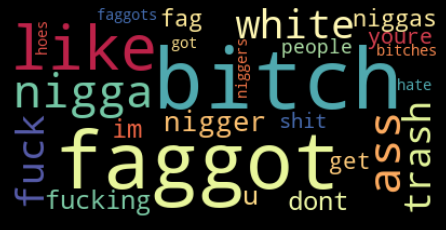

In [48]:
# create the word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(hate_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

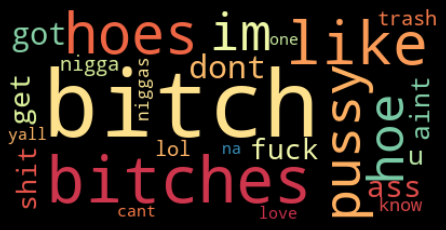

In [49]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_hate_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()